<a href="https://colab.research.google.com/github/tgngenuka/Artificial-Intelligence-Bootcamp-TechCrush/blob/main/Raisin_Variety_Classification_Dataset_2_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import & Install libraries

In [ ]:
!pip install pandas scikit-learn openpyxl

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


Load the Data

In [ ]:
df = pd.read_excel("Raisin_Dataset.xlsx")
print(df.head())


    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


Separate Features and Class

In [ ]:
X = df.drop("Class", axis=1)  # Features (measurements)
y = df["Class"]               # The type of raisin (label)

# Convert text (Kecimen/Besni) into numbers (0/1)
le = LabelEncoder()
y = le.fit_transform(y)


Split Data (80:20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42, stratify=y
      )



Train Model with Cross-Validation

In [ ]:
log_reg = LogisticRegression(max_iter=800)

# 5-Fold Cross Validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validation accuracies:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


Cross-validation accuracies: [0.81944444 0.875      0.86111111 0.84722222 0.88888889]
Average CV Accuracy: 0.8583333333333332


Final Training & Test Accuracy

In [ ]:
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.8888888888888888


Evaluate Model

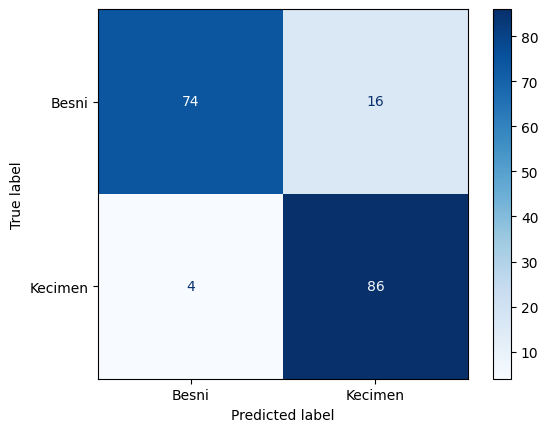

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")

In [61]:
import numpy as np

# Accuracy from confusion matrix
cm_accuracy = np.trace(cm) / np.sum(cm)   # trace = correct predictions
print("Confusion Matrix Accuracy:", cm_accuracy)

Confusion Matrix Accuracy: 0.8888888888888888
